# <font color = 'tomato'>Hyperspectral Image Analysis - Classification</font>

## Import Libraries

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sn

## Download HSI Data

In [ ]:
!wget http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat

--2021-12-03 16:58:15--  http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5953527 (5.7M)
Saving to: ‘Indian_pines_corrected.mat’

Indian_pines_correc 100%[===================>]   5.68M   357KB/s    in 17s     

2021-12-03 16:58:33 (333 KB/s) - ‘Indian_pines_corrected.mat’ saved [5953527/5953527]

--2021-12-03 16:58:33--  http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1125 (1.1K)
Saving to: ‘Indian_pines_gt.mat’

Indian_pines_gt.mat 100%[===================>]   1.10K  --.-KB/s    in 0s      

2021-12-03 16:58:33 (229 MB/s) - ‘Indian_pines_gt.mat’ saved [1125/1125]

FINISHED --2021-12-03 16:58:33--
Total wall clock time: 19s
Downloaded: 2

In [ ]:
!ls

Indian_pines_corrected.mat  Indian_pines_gt.mat  sample_data


## Read the Data

In [ ]:
from scipy.io import loadmat

def read_HSI():
  X = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
  y = loadmat('Indian_pines_gt.mat')['indian_pines_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()

X shape: (145, 145, 200)
y shape: (145, 145)


### Visualize Bands

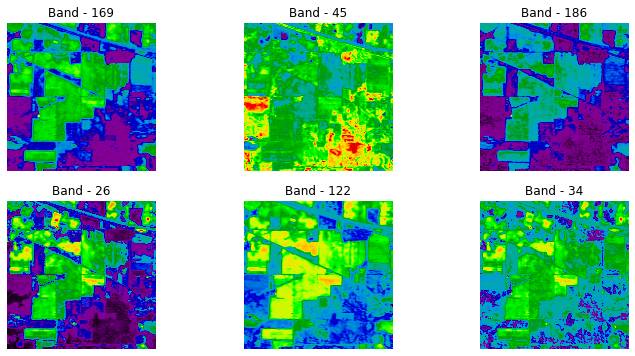

In [ ]:
fig = plt.figure(figsize = (12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')
plt.savefig('IP_Bands.png')

### Visualize the Ground Truth

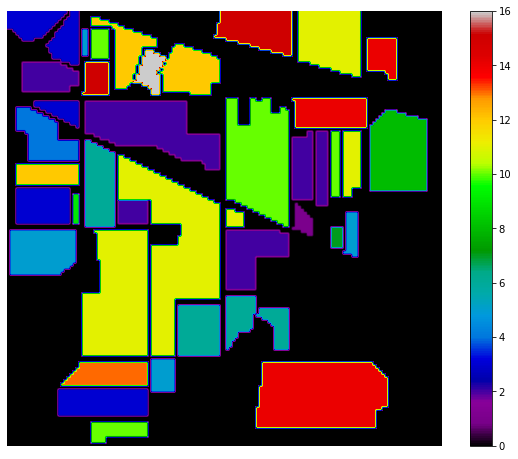

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_GT.png')
plt.show()

## Convert the dataset into csv 

In [ ]:
import pandas as pd
import numpy as np

def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df
  
df = extract_pixels(X, y)


In [ ]:
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24,band25,band26,band27,band28,band29,band30,band31,band32,band33,band34,band35,band36,band37,band38,band39,band40,...,band162,band163,band164,band165,band166,band167,band168,band169,band170,band171,band172,band173,band174,band175,band176,band177,band178,band179,band180,band181,band182,band183,band184,band185,band186,band187,band188,band189,band190,band191,band192,band193,band194,band195,band196,band197,band198,band199,band200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,4816,4769,4610,4805,4828,4861,4767,4624,4549,4463,4462,4446,4445,4336,4381,4319,4207,4305,4311,3991,4168,3942,4061,4362,4318,4252,4869,5284,5055,3591,...,1396,1381,1396,1381,1353,1346,1341,1332,1324,1310,1318,1330,1310,1292,1280,1275,1266,1264,1233,1241,1232,1215,1215,1187,1168,1171,1150,1134,1123,1135,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,5141,5100,4994,5172,5290,5289,5217,5053,5033,4939,4931,4941,4902,4824,4859,4805,4698,4794,4806,4452,4628,4433,4643,4967,4853,4760,5449,5768,5684,3987,...,1421,1415,1428,1415,1379,1370,1360,1353,1352,1336,1346,1351,1330,1315,1305,1292,1282,1286,1259,1259,1250,1229,1232,1195,1177,1184,1153,1137,1138,1137,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,5227,5172,5097,5313,5411,5412,5341,5191,5140,5069,5110,5119,5046,4981,5023,4987,4862,4965,4992,4595,4756,4529,4801,5077,4983,4868,5515,5972,5913,4027,...,1446,1440,1443,1425,1390,1379,1376,1363,1355,1347,1361,1356,1341,1330,1321,1304,1290,1289,1263,1269,1261,1245,1241,1214,1185,1188,1156,1147,1149,1144,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,5147,5078,5040,5237,5321,5344,5255,5121,5035,4956,4994,4980,4905,4857,4900,4831,4720,4848,4847,4484,4613,4402,4674,4966,4848,4776,5473,5894,5789,4086,...,1432,1427,1426,1416,1386,1374,1375,1359,1343,1343,1354,1351,1333,1329,1313,1296,1280,1281,1251,1255,1253,1238,1223,1207,1188,1188,1154,1143,1144,1146,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,4853,4857,4734,4879,4976,4958,4885,4754,4647,4532,4586,4591,4492,4453,4497,4398,4297,4408,4401,4102,4227,4075,4264,4529,4490,4438,5001,5378,5321,3779,...,1401,1397,1395,1390,1368,1349,1354,1340,1330,1324,1336,1332,1320,1307,1287,1283,1267,1265,1239,1240,1239,1229,1212,1202,1178,1178,1143,1135,1138,1135,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21025 entries, 0 to 21024
Columns: 201 entries, band1 to class
dtypes: uint16(200), uint8(1)
memory usage: 8.0 MB


In [ ]:
df.iloc[:, :-1].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24,band25,band26,band27,band28,band29,band30,band31,band32,band33,band34,band35,band36,band37,band38,band39,band40,...,band161,band162,band163,band164,band165,band166,band167,band168,band169,band170,band171,band172,band173,band174,band175,band176,band177,band178,band179,band180,band181,band182,band183,band184,band185,band186,band187,band188,band189,band190,band191,band192,band193,band194,band195,band196,band197,band198,band199,band200
count,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,...,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000
mean,2957.363472,4091.321237,4277.502259,4169.956671,4516.678668,4790.595149,4848.317574,4714.732509,4668.904828,4439.065541,4407.192580,4307.541831,4148.396671,4400.474625,4470.958811,4447.711106,4286.070059,4070.359239,3967.324899,3861.227491,3833.674863,3810.350773,3742.210131,3657.676243,3651.536837,3562.264067,3453.274340,3489.048133,3465.970036,3250.786064,3504.638906,3224.430059,3511.536457,3948.562235,4173.646468,4445.024209,5309.742592,5950.961427,5937.520761,4137.620214,...,1254.995719,1253.893698,1253.598954,1254.374792,1249.088989,1234.321950,1228.068966,1226.639191,1223.088181,1217.272818,1211.462497,1222.972699,1221.611510,1211.583353,1199.533841,1184.804328,1174.728704,1166.305161,1161.820975,1149.567562,1148.084661,1143.412224,1132.359049,1131.622354,1112.867729,1103.281665,1105.472010,1088.798526,1080.433864,1080.911772,1079.310773,1061.927848,1060.210273,1063.276813,1050.048514,1040.201141,1043.370321,1030.194816,1015.571463,1008.513579
std,354.918708,230.390005,257.827640,280.761254,346.035984,414.382138,469.247667,491.728349,533.232855,539.908195,596.191887,674.239859,758.736727,641.221504,634.474623,669.627965,780.740920,852.027946,851.726987,862.120047,876.971776,903.453740,913.732735,917.458683,948.550739,964.297455,957.530392,1019.462914,1033.900906,921.367065,888.806543,909.962902,897.964022,853.073211,654.626044,401.402675,507.061364,720.970575,807.181782,644.574920,...,143.890827,141.264146,139.622976,139.345592,135.489840,126.123887,121.220250,118.651873,116.213130,110.927274,107.742597,112.155944,113.404495,108.799962,104.094061,96.958495,94.966743,92.167377,90.488063,85.149059,85.052178,84.259071,77.447304,77.209432,68.365788,63.499265,63.683355,54.247073,49.002958,50.557675,49.943791,38.843805,38.712195,41.920969,34.242725,26.452672,29.794418,20.865106,11.386402,7.050921
min,2560.000000,2709.000000,3649.000000,2810.000000,3840.000000,4056.000000,4004.000000,3865.000000,3775.000000,2792.000000,2700.000000,2594.000000,2560.000000,2600.000000,2665.000000,2614.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2560.000000,2521.000000,2452.000000,2398.000000,2289.000000,2211.000000,2178.000000,2139.000000,2054.000000,2272.000000,2013.000000,2165.000000,2364.000000,2359.000000,2400.000000,2588.000000,2723.000000,2675.000000,2127.000000,...,1026.000000,1024.000000,1029.0000

## Principal Component Analysis(PCA)


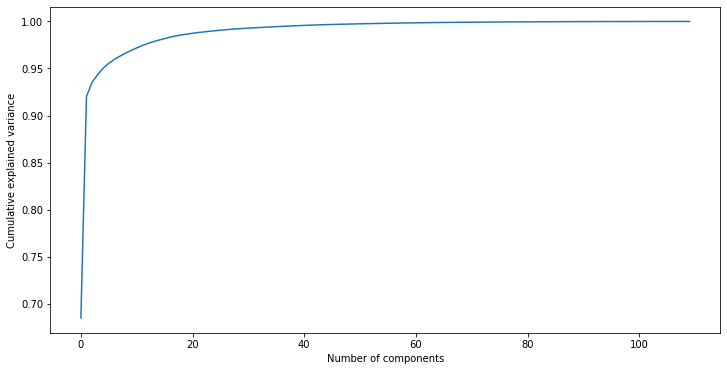

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 110)# 95 115

principalComponents = pca.fit_transform(df.iloc[:, :-1].values)

ev=pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


plt.show()


Select 40 as the no.of components for PCA

In [ ]:
pca = PCA(n_components = 15) #10 5 15 
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,16)]+['class']

In [ ]:
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12,PC-13,PC-14,PC-15,class
0,5014.905985,1456.863260,72.697049,71.204923,-435.686988,-68.840370,134.810085,-304.373128,256.428951,-66.631738,-122.605850,-29.193993,-121.098914,174.832952,-148.641632,3
1,5601.383743,-2023.450087,350.134661,-528.465050,148.088297,-288.359021,202.956731,240.848307,-474.855829,93.493789,302.627103,-8.499760,-78.956273,31.232464,66.954795,3
2,5796.135442,-3090.394852,490.539929,-760.214341,259.933307,-131.611136,172.927066,205.911877,572.496776,-191.621684,404.002784,-58.688137,-22.359107,-78.571971,-46.962589,3
3,5586.204575,-2369.376085,356.274719,-502.687152,146.554953,-306.679305,251.070935,234.966816,-314.020958,54.962515,328.631070,35.033680,-46.570997,20.725191,146.104830,3
4,5020.990792,339.603390,-23.007525,-92.556769,-368.495443,-438.266713,502.715439,-345.536663,-188.353259,-67.506091,-256.849454,61.322429,57.617501,30.986949,26.170904,3


### Display the bands after PCA

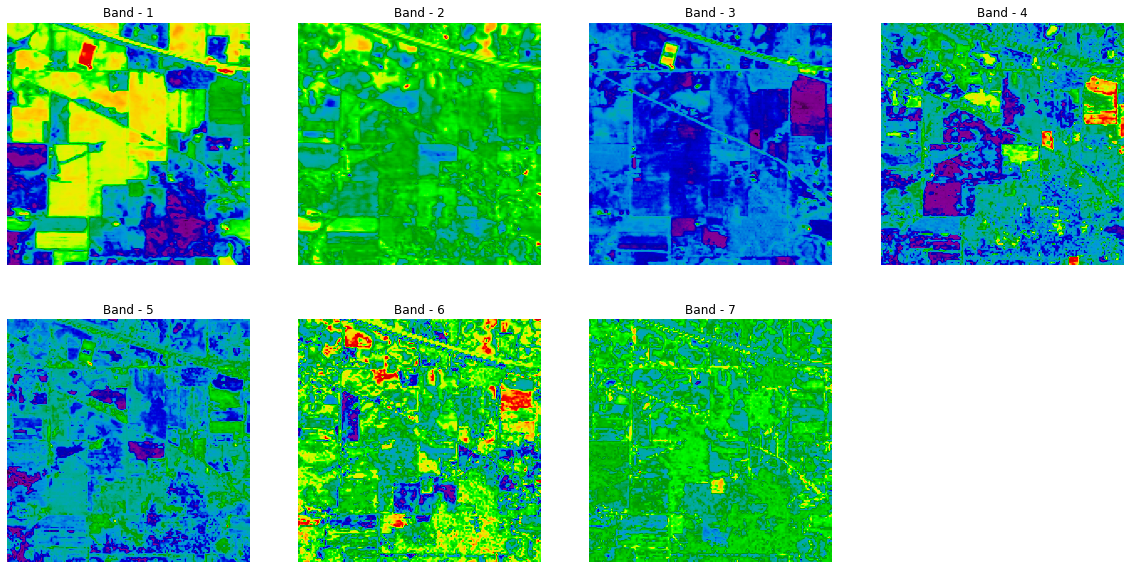

In [ ]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 1+7):
    fig.add_subplot(2,4, i)
    plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(145, 145), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {i}')

plt.savefig('IP_PCA_Bands.png')

In [ ]:
# saving to .csv
q.to_csv('IP_40_PCA.csv', index=False)

## Support Vector Machine(SVM)


In [ ]:
x = q[q['class'] != 0]

X = x.iloc[:, :-1].values

y = x.loc[:, 'class'].values 

names = ['Alfalfa',	'Corn-notill', 'Corn-mintill',	'Corn',		'Grass-pasture','Grass-trees',
'Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill','Soybean-mintill',
'Soybean-clean', 'Wheat',	'Woods',	'Buildings Grass Trees Drives',	'Stone Steel Towers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11, stratify=y) #test 5,10,15,20,25,30
svm =  SVC(C = 100, kernel = 'rbf', cache_size = 10*1024) #kernel change

In [ ]:
svm.fit(X_train, y_train)
ypred = svm.predict(X_test)

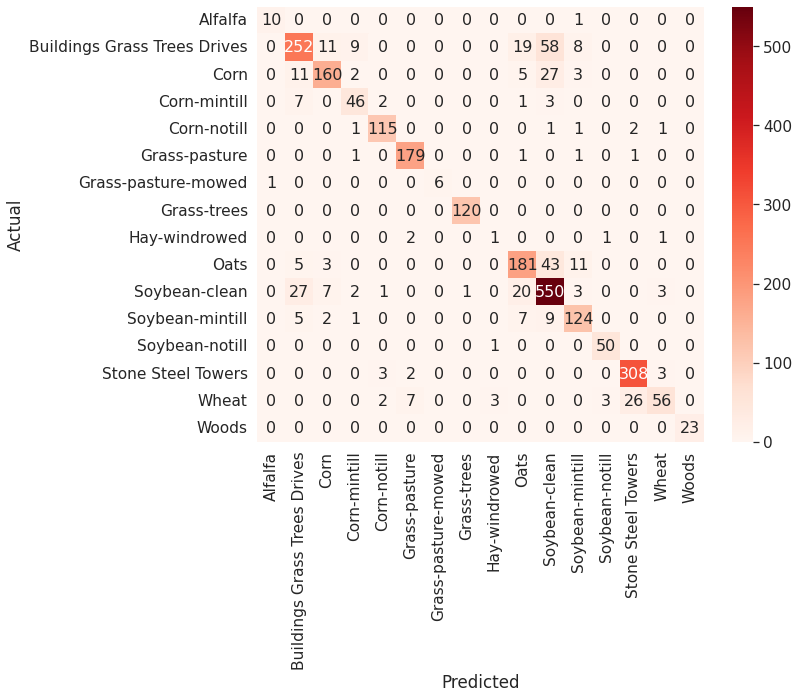

In [ ]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=np.unique(names), index = np.unique(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')
plt.savefig('cmap.png', dpi=300)

In [ ]:
print(classification_report(y_test, ypred, target_names = names))

                              precision    recall  f1-score   support

                     Alfalfa       0.91      0.91      0.91        11
                 Corn-notill       0.82      0.71      0.76       357
                Corn-mintill       0.87      0.77      0.82       208
                        Corn       0.74      0.78      0.76        59
               Grass-pasture       0.93      0.95      0.94       121
                 Grass-trees       0.94      0.98      0.96       183
         Grass-pasture-mowed       1.00      0.86      0.92         7
               Hay-windrowed       0.99      1.00      1.00       120
                        Oats       0.20      0.20      0.20         5
              Soybean-notill       0.77      0.74      0.76       243
             Soybean-mintill       0.80      0.90      0.84       614
               Soybean-clean       0.82      0.84      0.83       148
                       Wheat       0.93      0.98      0.95        51
                   

## Classification Map

In [ ]:
l=[]
for i in range(q.shape[0]):
  if q.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(svm.predict(q.iloc[i, :-1].values.reshape(1, -1)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



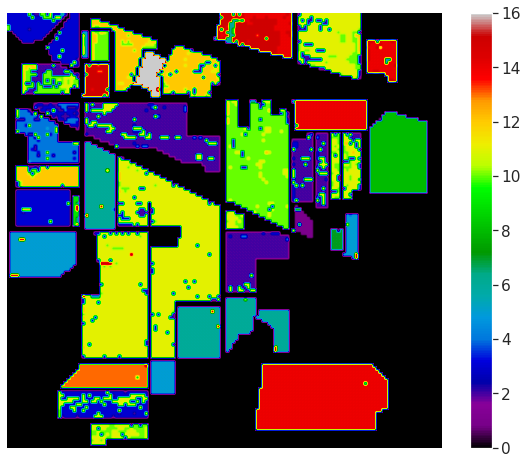

In [ ]:
clmap = np.array(l).reshape(145, 145).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_cmap.png')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8357393679282091


In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 19.933281310963714
Mean Squared Error: 7.164650799843933
Root Mean Squared Error: 2.6766865337285823


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 10   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0 259  11   7   0   0   0   0   0   9  64   7   0   0   0   0]
 [  0  19 138   3   0   0   0   0   0   2  36  10   0   0   0   0]
 [  0  15   3  33   0   1   0   1   0   1   3   2   0   0   0   0]
 [  0   0   0   0 112   1   0   0   0   0   1   1   0   3   2   1]
 [  0   0   0   1   0 182   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   6   1   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0 119   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   3   0   0   2   0   0   0   0   0   0   0]
 [  0   2   8   0   2   1   0   0   0 190  29  10   0   0   1   0]
 [  0  33   8   0   3   0   0   0   0  14 549   4   0   0   3   0]
 [  0  11   4   3   0   0   0   0   0   8  12 110   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  48   0   3   0]
 [  0   0   0   0   2   0   0   0   0   0   0   0   0 309   5   0]
 [  1   0   0   0   1  11   0   0   0   1   2   1   2  24  54 

**Factor Analysis**

In [ ]:
!pip install factor_analyzer

     |████████████████████████████████| 41 kB 262 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=3704eba5ce1aa0f935f9b33155eefe4eebb324da8fd74bb0983f4b30e79c5e16
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


array([1.37282723e+02, 3.83897485e+01, 5.13154309e+00, 3.37311519e+00,
       2.09831672e+00, 1.78167108e+00, 9.48327967e-01, 8.61330180e-01,
       7.85121594e-01, 7.39972359e-01, 6.91849384e-01, 5.69079134e-01,
       4.90412464e-01, 4.26637205e-01, 3.86550654e-01, 3.70920389e-01,
       3.60266073e-01, 3.48383968e-01, 3.15594787e-01, 3.08028322e-01,
       3.00027204e-01, 2.63177058e-01, 2.42202288e-01, 2.21448601e-01,
       2.00053177e-01, 1.91286638e-01, 1.75084374e-01, 1.67430113e-01,
       1.58829854e-01, 1.51764527e-01, 1.43880362e-01, 1.39420870e-01,
       1.34398571e-01, 1.25123001e-01, 1.22651720e-01, 1.18018119e-01,
       1.16233079e-01, 1.03675645e-01, 9.85832006e-02, 9.17204163e-02,
       8.89538735e-02, 8.32460660e-02, 7.71856222e-02, 7.35280999e-02,
       6.85893492e-02, 6.60459673e-02, 6.17144488e-02, 6.04267435e-02,
       5.46759421e-02, 5.21294878e-02, 4.70422886e-02, 4.43235658e-02,
       4.40875403e-02, 4.31154653e-02, 3.97042348e-02, 3.93558234e-02,
      

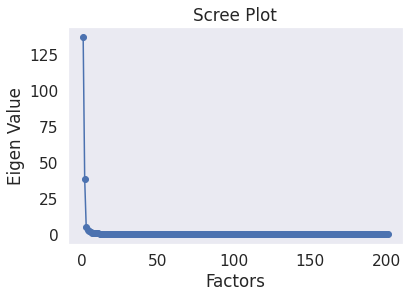

In [ ]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=df.shape[1])
fa.fit(df)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()
ev

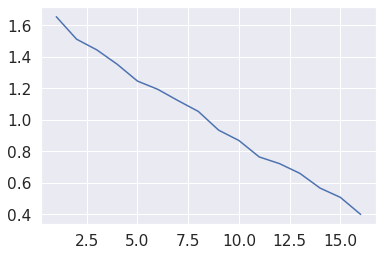

In [ ]:
fa = FactorAnalyzer()
fa.fit(x, 10)


#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

In [ ]:
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(x)
loads = fa.loadings_
print(loads)

[[-0.2075203   0.18504628 -0.16461464]
 [-0.09567888 -0.33240248  0.13435644]
 [ 0.77916857  0.38953001 -0.27069323]
 [-0.09735335  0.13434888 -0.14023835]
 [-0.05367558  0.043046    0.3570837 ]
 [ 0.0094412   0.11305561  0.36321553]
 [ 0.0153753  -0.39543079 -0.24564098]
 [-0.021908    0.38096469  0.26392836]
 [ 0.1081384   0.0032002   0.00132614]
 [ 0.00520027  0.0954199  -0.25072976]
 [ 0.00790368 -0.00173336 -0.10242341]
 [-0.092678    0.24022291 -0.03217128]
 [-0.17208816  0.01238924 -0.01965872]
 [ 0.08852065 -0.03636271 -0.03146768]
 [ 0.03538926 -0.03642146  0.19745439]
 [ 0.60593368 -0.39682875  0.36382572]]


In [ ]:
fa.get_factor_variance()

(array([1.09871793, 0.85775149, 0.77465   ]),
 array([0.06866987, 0.05360947, 0.04841563]),
 array([0.06866987, 0.12227934, 0.17069496]))

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

/usr/local/lib/python3.7/dist-packages/factor_analyzer/factor_analyzer.py:111: RuntimeWarning:

divide by zero encountered in log



(inf, 0.0)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2159: RuntimeWarning:

overflow encountered in det



0.9980902709628682